In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
# reading the data
df = pd.read_csv("../input/ab-nyc-2019/AB_NYC_2019.csv")
df.head()

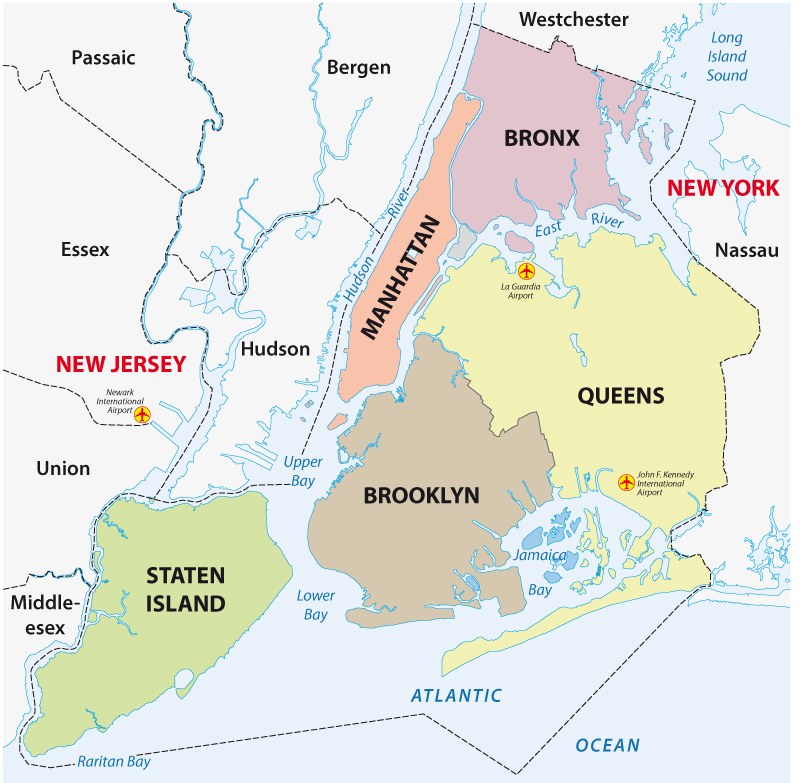

# Pandas Profiling Package

In [ ]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install pandas_profiling

# EDA with Pandas Profileing Library 

In [ ]:
import pandas_profiling
df.profile_report()

In [ ]:
#Let's see about the datatypes of the data
df.dtypes

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
df = df[ ['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365','price'] ]

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
# with default: dropna = True and missing values are not unique!
df.host_id.nunique()

# Data Cleaning & Pre-Processing

In [ ]:
df.isna().sum()

In [ ]:
df.last_review

In [ ]:
# converting last_review to datetime
# replacing NaN values with 0 

df['last_review']= pd.to_datetime(df['last_review'])

df.last_review.fillna(max(df.last_review),inplace=True)

df.reviews_per_month.fillna(0,inplace=True)

In [ ]:
df.reviews_per_month

In [ ]:
#removing unwanted columns
df.drop(['name','host_name'],axis=1,inplace=True)

In [ ]:
#checking if any null values present now
df.isna().sum()

# Exploratory Data Analysis

let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service

In [ ]:
top_host = df.host_id.value_counts().head(10)
top_host

### The host with maximum number of listings registered for airbnb in NewYork has 327 listings.

### lets create a DataFrame!

In [ ]:
top_host_df = pd.DataFrame(top_host)

top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'

In [ ]:
top_host_check = df.calculated_host_listings_count.max()
top_host_check

In [ ]:
df.neighbourhood_group.unique()

In [ ]:
df.room_type.unique()

let's grab 10 most reviewed listings in NYC

In [ ]:
top_reviewed_listings = df.nlargest(10,'number_of_reviews')
top_reviewed_listings

# Exploring and Visualizing Data

In [ ]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [ ]:
viz_1 = sns.barplot(x="Host_ID", y="P_Count", data=top_host_df, palette='Blues_d')

viz_1.set_title('Hosts with the most listings in NYC')

viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')

viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45);

In [ ]:
#setting figure size for future visualizations

sns.set(rc = {'figure.figsize':(8,5)} )

viz_1 = top_host.plot(kind='barh',cmap='plasma')

# Kind = pie
# plasma is for color blue color

viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Host IDs')
viz_1.set_xlabel('Count of listings')

# viz_1.set_xticklabels(viz_1.get_xticklabels())

In [ ]:
df.neighbourhood.value_counts()[:20]
df

In [ ]:
plt.style.use("fivethirtyeight")


data = df.neighbourhood.value_counts()[:20]

plt.figure(figsize=(12, 8))

x = list(data.index) 
y = list(data.values)

# x.reverse()
# y.reverse()


plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

In [ ]:
avg_by_neighbourhood_group = df.groupby(['neighbourhood_group']).mean()
avg_by_neighbourhood_group

In [ ]:
# Let's prepare some data through indexing, grouping and sorting before we plot it

avg_by_neighbourhood_group = df.groupby(['neighbourhood_group']).mean()
avg_price_by_neighbourhood_group_sorted= avg_by_neighbourhood_group['price'].sort_values(ascending=False)
avg_price_by_neighbourhood_group_sorted

In [ ]:
# Here I decided to state the colors ahead of time as a named list and pass that list when plotting the bar
sns.set_style('darkgrid')

le_colors =['g','b','m','r','y']
plt.bar(x=avg_price_by_neighbourhood_group_sorted.index, height=avg_price_by_neighbourhood_group_sorted, color=le_colors)

plt.title('Average Rental Price Across neighbourhood_group',color='r',fontsize=13,fontweight='bold')
plt.xlabel('neighbourhood_group',color='r',fontsize=13)
plt.ylabel('Average Price',color='r',fontsize=13)
plt.ylim(0,250)

# i want to add the values for the bars

In [ ]:
sns.countplot(x='neighbourhood_group',data= df )

In [ ]:
a=df.groupby('neighbourhood_group').calculated_host_listings_count.sum()
a

plt.style.use('ggplot')
a.plot(kind='barh')

# Obeservations:

* Manhattan neighbourhood group has highest number of listings in whole New York area.
* Number of hosts ownning the listings are highest in Manhattan followed by Brooklyn

In [ ]:
df.groupby('neighbourhood_group')['neighbourhood'].nunique().plot(kind='barh',colormap='Set2')


plt.xlabel('neighbourhood groups')
plt.ylabel('neighbourhoods')

print(df.groupby('neighbourhood_group')['neighbourhood'].nunique())

# Observation: 
### Queens has highest number of neighbourhoods within its zone while Manhattan has lowest number of neighbourhoods. Still, number of listings registered in AirBnB is in Manhattan region

In [ ]:
# One useful way of visualizing this would be to separate the values into ranges of days,
# say into 4 groups as follows:

a_availability = df[df['availability_365']<=90].count()[0]
b_availability = df[(df['availability_365']>90) & (df['availability_365']<=180)].count()[0]
c_availability = df[(df['availability_365']>180) & (df['availability_365']<=270)].count()[0]
d_availability = df[(df['availability_365']>270)].count()[0]

In [ ]:
c_availability

In [ ]:
df[(df['availability_365']>90) & (df['availability_365']<=180)]

In [ ]:
df[(df['availability_365']>90) & (df['availability_365']<=180)].count()

In [ ]:
# With our ranges created using indexing and '&' operators, the data can be plotted in a pie chart

labels = 'Less than 90 days','Between 90 & 180 days','Between 180 & 270 days','Greater than 270 days'

sizes = a_availability,b_availability,c_availability,d_availability
explode = (.1,.1,.1,.1)

availability_pie = plt.pie(sizes,labels=labels,explode=explode,shadow=True,startangle=90,autopct='%1.1f%%',radius=1.1)
plt.title('Availability of Airbnb Rentals\n'+'of the Calendar Year 2019');

In [ ]:
print('Total neighbourhoods in NYC in which listings are located: {}'.format(df.neighbourhood.value_counts().sum()))

plt.figure(figsize=(24,16))

# Top 10 neighbourhoods in NYC

plt.subplot(2,1,1)
V2=sns.countplot(y='neighbourhood', #Create a Horizontal Plot
                   data=df,                                                    
                   order=df.neighbourhood.value_counts().iloc[:10].index, #We want to view the top 10 Neighbourhoods
                   edgecolor=(0,0,0), #This cutomization gives us black borders around our plot bars
                   linewidth=3)

V2.set_title('Listings by Top NYC Neighbourhood') #Set Title
V2.set_xlabel('Neighbourhood')                                  
V2.set_ylabel('Listings')

# 10 Least preferred neighbourhood in NYC

plt.subplot(2,1,2)
V3 = sns.countplot(y='neighbourhood',
                   data=df,                                                    
                   order=df.neighbourhood.value_counts().iloc[-10:].index,
                   edgecolor=(0,0,0), 
                   linewidth=3)

V3.set_title('Listings by Least Preffered NYC Neighbourhood')   
V3.set_xlabel('Neighbourhood')                                  
V3.set_ylabel('Listings')

# Room type analysis

In [ ]:
df.room_type.unique()

In [ ]:
by_room = df.groupby('room_type').agg(['count'])
by_room.head()
# low number of shared room and discovered hard

Next, let's turn our attention to price distributions

In [ ]:
# It would be great to break things down by borough AND room type. There are several ways to do so.
# A pivot table is a great place to start

room_pivot = pd.pivot_table(df,'price',['neighbourhood_group','room_type'],aggfunc=np.mean)
room_pivot

In [ ]:
by_room = df.groupby('room_type').agg(['count'])
by_room.head()

In [ ]:
sns.countplot(x='room_type',data=df ,edgecolor=sns.color_palette("dark"))
df.room_type.value_counts()

In [ ]:
print('Percentage of room types available in AirBnB registered listings are:\n{}'.format((df.room_type.value_counts()/len(df.room_type))*100))


In [ ]:
# Visualisation - Neighbourhood groups with counts with category room_type

plt.figure(figsize=(15,6))

sns.countplot(data=df, x='neighbourhood_group', hue='room_type', palette='GnBu_d')

plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=15,fontweight='bold')
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")

plt.legend(frameon=False, fontsize=12)

In [ ]:
top_nei = df['neighbourhood'].value_counts().reset_index().head(10)
top_nei = top_nei['index']

plt.figure(figsize=(15,6))
vis_3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type',
                    data=df.loc[df['neighbourhood'].isin(top_nei)], kind='count', palette='GnBu_d')

vis_3.set_xticklabels(rotation=90)

In [ ]:
b=df.room_type.value_counts()/len(df.room_type)

b.plot.pie(autopct='%.2f',fontsize=12,figsize=(8,8))

plt.title('Room types availability in AirBnB',fontsize=20)

In [ ]:
! pip install plotly

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
labels = df.room_type.value_counts().index
values = df.room_type.value_counts().values

labels

In [ ]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

labels = df.room_type.value_counts().index
values = df.room_type.value_counts().values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])

fig.update_traces(marker=dict(colors = colors, line=dict(color='#000000', width=4)))

fig.show()

In [ ]:
len(df.room_type)

# Number of room type in each neighbourhood group!

In [ ]:
df.groupby(['neighbourhood_group','room_type']).room_type.count().plot.barh()


plt.ylabel('Neighbourhood wise room types')
plt.xlabel('Number of Rooms')
plt.title('Neighbourhood groups Vs Room types availability');

In [ ]:
#grabbing top 10 neighbourhoods for sub-dataframe
sns.set(rc={'figure.figsize':(4,4)})

sub = df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen''East Village','Upper East Side','Crown Heights','Midtown'])]

sub

In [ ]:
#using catplot to represent multiple interesting attributes together and a count

viz=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub, kind='count')
viz.set_xticklabels(rotation=90)

# Observation:

#### In all the listings of rooms registered in AirBnB more than 50% of listings offer complete houses or apartments and remaining are private rooms. Only 2% of listings offer shared rooms.
#### Brooklyn is a zone which has maximum listings offering private rooms while manhattan is an hub of apartment offerings, followed by Brooklyn.
#### Bronx, Queen and Staten Island has least number of listings registered and does not offer much of the services.

# Price wise analysis of rooms

In [ ]:
df.groupby('neighbourhood_group').price.describe()

In [ ]:
# setting up bins for price in order to have better understanding of rooms distribution
df['price_range']=pd.cut(df['price'],4)

In [ ]:
df.head()

In [ ]:
list(df.neighbourhood_group.unique())

In [ ]:
neighbourhood_group=list(df.neighbourhood_group.unique())

plt.figure(figsize=(40,36))

for i,neighbour in enumerate(neighbourhood_group):
    plt.subplot(3,2,i+1)
    sns.countplot(y='price_range',hue='room_type',data=df[df['neighbourhood_group']==neighbour])
    
    plt.xlabel('Number of listings')
    plt.ylabel('Price range in which listings fall')
    plt.title('Price listings vs neighbourhood and room types in {}'.format(neighbour))

In [ ]:
g = df[df.price <500]

plt.figure(figsize=(10,6))

sns.boxplot(y="price",x ='neighbourhood_group' ,data = g)
plt.title("neighbourhood_group price distribution < 500")
# plt.show()

In [ ]:
# distribution of prices

plt.figure(figsize=(15,6))

sns.violinplot(data=df[df.price <500], x='neighbourhood_group', y='price', palette='GnBu_d')

plt.title('Density and distribution of prices for each neighbourhood group', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")

In [ ]:
!pip install calmap

!pip install folium

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
import calmap
import folium

In [ ]:
fig = px.histogram(df, x="neighbourhood_group", color = 'neighbourhood_group', height=600, width=800, )
fig.update_layout(showlegend = True)
fig.show()

In [ ]:
plt.figure(figsize=(10,6))

sns.distplot(df[df.neighbourhood_group=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(df[df.neighbourhood_group=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(df[df.neighbourhood_group=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(df[df.neighbourhood_group=='Staten Island'].price,color='blue',hist=False,label='State Island')
sns.distplot(df[df.neighbourhood_group=='Long Island'].price,color='lavender',hist=False,label='Long Island')
plt.title('Borough wise price destribution for price<2000')
plt.xlim(0,2000)
plt.show()

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(df, hue="neighbourhood_group", aspect=4, height=10)
fig.map(sns.kdeplot, 'host_id', shade=True)
oldest = df['host_id'].max()
fig.set(xlim=(0, oldest))
sns.set(font_scale=5)
fig.add_legend()

# Observation:

##### In all listings registered in AirBnB New York, private rooms are most expensive in Manhattan region with an average price of registered listing being 197 dollars, and average price of private room is 116.78 dollars and individual apartment being 249.23 dollars.

##### The neighbourhood region with maximum number of affordable rooms is Brooklyn with more than 10000 private rooms with average price of 76 dollars and average price of entire apartment around 178 dollars.

##### The cheapest neighbourhood is Staten with an average price of 66 dollars and 127 dollars for private rooms and apartments respectively. Maximum price of apartment and private rooms in this neighbourgood is 1000 dollars and 2500 dollars respectively.

##### Manhattan is the most expensive region followed by Brooklyn.

In [ ]:
rooms=list(df.room_type.unique())

for i,room in enumerate(rooms):
    plt.figure(figsize=(9,18))
    plt.subplot(3,1,i+1)
    sns.barplot(y='price_range',x='minimum_nights',data=df[(df.room_type==room)])
    sns.set(font_scale=1)
    plt.title(room)

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='minimum_nights',y='price',data=df)

# Minimum Nights and price range

In [ ]:
df.groupby(['room_type','price_range'])['minimum_nights'].describe()

# Observation:

#### Minimum number of night stays has no significant impact on prices.

#### In case of private rooms, price range for longer duration with minimum stay of 8 nights and above is quite on a higher side. People pays huge amount to stay for longer days.

# Area wise visualization of availability of listings

In [ ]:
plt.figure(figsize=(10,6), dpi = 150)
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

In [ ]:
import folium
from folium.plugins import HeatMap


m = folium.Map([40.7128,-74.0060],zoom_start=11)

HeatMap(df[['latitude','longitude']].dropna(),radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)

display(m)

In [ ]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
viz=df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.9, figsize=(10,8))
viz.legend()

In [ ]:
import urllib

#initializing the figure size

plt.figure(figsize=(10,8))

#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)


#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])

ax=plt.gca()

#using scatterplot again
df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.6, zorder=5)

plt.legend()
plt.show()


In [ ]:
#let's grab 100 most reviewed listings in NYC
top_reviewed_listings=df.nlargest(100,'number_of_reviews')
top_reviewed_listings

In [ ]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

In [ ]:
top_reviewed_listings.groupby('room_type')['price'].describe()

# Observation:

##### Most of listings who got more reviews have private rooms.
##### Probably people prefer to book apartment or private rooms as compared to shared room and give reviews.
##### Average price for preferred apartment is 170 dollars and 74 dollars for private rooms.

In [ ]:
sns.boxplot(y='price',x='room_type',data=top_reviewed_listings)

# Room availability

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['minimum_nights'], bins=30)

#(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)
# copy above code in to the first [] 
plt.ioff()

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap='spring', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df.longitude, df.latitude, c=df.price, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Price $')

# Observation:
#### Most of the listings have room availability for booking for minimum of 1 day

# Correlation among variables

In [ ]:
df.corr()

In [ ]:
#Get Correlation between different variables
corr = df.corr()
plt.figure(figsize=(12,8))

sns.heatmap(corr, annot=True)
df.columns

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

plt.subplots(figsize=(25,15))

wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()